# Activity 4
### <font color='blue'>Due: Monday, February 21</font>


Import relevant packages:

In [1]:
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u
import numpy as np

%matplotlib inline

## Example 1
Create a plot of three sinusoidal functions. Use different line styles and colors, add a legend, and label your axes. Add text that shows the general form of the sinusoid function to the plot.

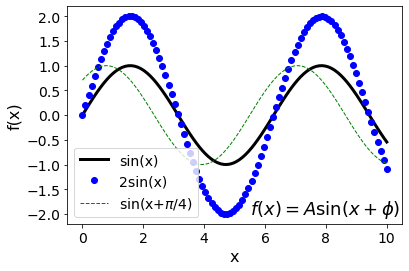

In [2]:
# Create an x-range first
x = np.linspace(0,10,100)

# and now three sine wave functions:
y1 = np.sin(x)
y2 = 2 * np.sin(x)
y3 = np.sin(x + np.pi/4)

# Make the plot
plt.plot(x,y1,'-k',lw=3,label='sin(x)')
plt.plot(x,y2,'ob',lw=1,label='2sin(x)')
plt.plot(x,y3,'--g',lw=1,label=r'sin(x+$\pi$/4)')

# Add a legend
plt.legend(fontsize=14)

# Add text to the figure
plt.text(5.5,-2,r'$f(x)=A$sin($x+\phi$)',fontsize=18)

# Label axes and adjust font sizes
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## <font color='blue'>Question 1</font>
The constellation Orion's seven brightest stars form a distinctive hourglass-shaped asterism, or pattern, in the night sky. Four stars—Rigel, Betelgeuse, Bellatrix, and Saiph—form a large roughly rectangular shape, at the center of which lies the three stars of Orion's Belt—Alnitak, Alnilam, and Mintaka. Descending from the "belt" is a smaller line of three stars, Orion's Sword (the middle of which is in fact not a star but the Orion Nebula), also known as the hunter's sword.

Look up the coordiantes of Rigel, Betelgeuse, Bellatrix, Saiph, Alnitak, Alnilam, Mintaka, and the Orion Nebula. Make a plot in RA-Dec space showing the locations of the stars, label the stars, and "connect the dots" to draw the Orion asterism.

Text(0, 0.5, 'Dec(deg)')

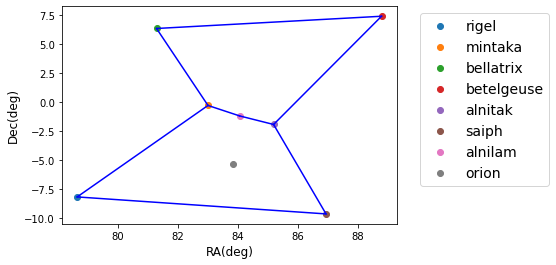

In [198]:
# Your code goes here
rigel = SkyCoord('05h14m32.3s', '-08d12m06s')
betelgeuse = SkyCoord('5h55m10s', '+07d24m26s')
bellatrix = SkyCoord('5h25m8s', '+6d20m59s')
saiph = SkyCoord('05h47m45.38s', '−09d40m10.5777s')
alnitak = SkyCoord('05h40m45.5s', '-01d56m34s')
alnilam = SkyCoord('5h36m13s', '-1d12m7s')
mintaka = SkyCoord('5h32m0s', '-0d17m57s')
orion = SkyCoord('5h35m17s', '-5d23m28s')

stars = np.array([rigel, mintaka, bellatrix, betelgeuse, alnitak,  saiph, alnilam, orion])
x = np.array([star.ra.value for star in stars])
y = np.array([star.dec.value for star in stars])

starname = ["rigel", 'mintaka', 'bellatrix',"betelgeuse", 'alnitak', 'saiph', 'alnilam', 'orion']

for i in range(len(x)):
    plt.scatter(x[i],y[i])

plt.legend(starname, fontsize=14, bbox_to_anchor = (1.05,1.0))

for i in range(len(x)-3):
    plt.plot(x[i:i+2], y[i:i+2], 'b-')
plt.plot(x[0:7:5], y[0:7:5], 'b-') 
plt.plot(x[4:7:2], y[4:7:2], 'b-')
plt.plot(x[1:7:5], y[1:7:5], 'b-')

plt.xlabel('RA(deg)',fontsize=12)
plt.ylabel('Dec(deg)',fontsize=12)

## Example 2
Create a scatter plot, representing points as semi-transparent circles with different colors and sizes.

You can also combine scatter plots and line plots, and modify the axis labels and font sizes the same exact way as in Example 1.

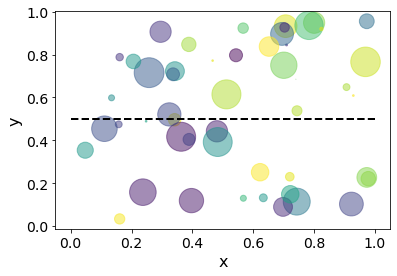

In [4]:
# First generate some random data.
# Fixing random state for reproducibility. Try changing this number and seeing what happens!
np.random.seed(19680801)

# Create 50 random points
N = 50
x = np.random.rand(N)
y = np.random.rand(N)

# Assign each point a random color
colors = np.random.rand(N)

# Assign each point a random size
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

# Make the plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)

# Add a line plot to the same figure
plt.plot([0,1],[0.5,0.5],'--k',lw=2)

plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## <font color='blue'>Question 2</font>
The Hubble Space Telescope has a primary mirror that is 2.4 m in diameter, and a wavelength sensitivity that ranges from about 220 nm to about 1.6$\mu$m. Hubble's imaging resolution is essentially diffraction limited.

Treat Hubble like a 1D single slit experiment. Make a plot showing the intensity as a function of off-axis angle for at least four different wavelengths that Hubble can detect. Confirm with your plots that $\theta_{\rm min}\approx\lambda/D$. _Hint_: Diffraction limited in UV-to-IR means very small angles!  Hubble's resolution is sub-arcsecond, so don't do your calculation over a "typical" trig function range (like 0 to 2$\pi$).

Plot minimumm agree with theory


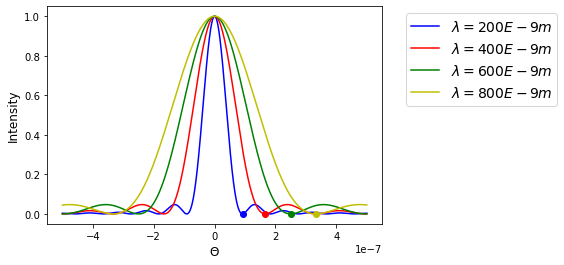

In [201]:
# Your code here

#define parameters
diameter = 2.4 #m 
x = np.arange(-5e-7,5e-7,1e-10)
wlen1 = 220e-9 #m
wlen2 = 400e-9 #m
wlen3 = 600e-9 #m
wlen4 = 800e-9 #m

#function for intensity
def I(wlen, x):
    beta = np.pi*diameter*np.sin(x)/wlen
    return (np.sin(beta)/beta)**2

#plot intensities
plt.plot(x,I(wlen1,x),"b")
plt.plot(x,I(wlen2,x),"r")
plt.plot(x,I(wlen3,x),"g")
plt.plot(x,I(wlen4,x),"y")
legd = ['$\lambda = 200E-9m$','$\lambda = 400E-9m$','$\lambda = 600E-9m$','$\lambda = 800E-9m$' ]
plt.legend(legd, fontsize=14, bbox_to_anchor = (1.05,1.0))


#plotting theoretical minimum
plt.plot(wlen1/diameter,0, 'bo')
plt.plot(wlen2/diameter,0, 'ro')
plt.plot(wlen3/diameter,0, 'go')
plt.plot(wlen4/diameter,0, 'yo')

plt.xlabel('$\Theta$',fontsize=12)
plt.ylabel('Intensity',fontsize=12)

print("Plot minimumm agree with theory")

## <font color='blue'>Question 3</font>
Suppose a certain PSF can be modeled as a Gaussian function described by:

$f(x)=\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}\left(\frac{x}{\sigma}\right)^2}$,

where $x$ is measured in pixels and $\sigma=4$ pixels.

Plot this function and determine the FWHM in pixels. If the detector has a plate scale of 0.5"/pixel, what is the FWHM in arcseconds?

FWHM is 9.42 pixels, or 4.71 arcseconds


Text(0, 0.5, 'f')

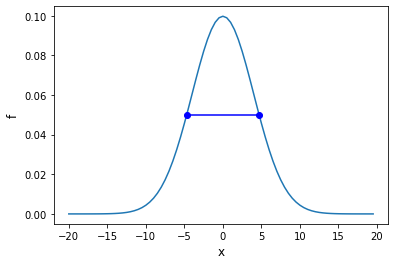

In [213]:
# Your code here
#define gaussian function 
def gaussian(x, sigma):
    return np.exp(-0.5*(x/sigma)**2)/(sigma*np.sqrt(2*np.pi))

#plot with 80 data points
sigma = 4
x = np.arange(-20,20,0.5) #pixels
f = gaussian(x,sigma)
plt.plot(x,f)

#reverse the gaussian function to look for x value at certain f value
def fwhm_gaus(f,sigma):
    return np.sqrt(np.log(f*(sigma*np.sqrt(2*np.pi)))*(-2)*sigma**2)

#80 data points, so max is at f[40]
#find and plot the FWHM
xhm = fwhm_gaus(f[40]/2,4)
plt.plot([xhm,-xhm],[f[40]/2,f[40]/2],"bo-") 
print("FWHM is %.2f pixels, or %.2f arcseconds" %(xhm*2, xhm*2*0.5))

plt.xlabel('x',fontsize=12)
plt.ylabel('f',fontsize=12)

## <font color='blue'>Question 4</font>
Similar to the previous question, but now with a Lorentzian function:

$f(x)=\frac{1}{2\pi}\frac{C}{\left(x^2 + C^2\right)^{3/2}}$

where $x$ is measured in pixels and $C=4$ pixels.

Plot this function and determine the FWHM in pixels. If the detector has a plate scale of 0.5"/pixel, what is the FWHM in arcseconds?

FWHM is 6.13 pixels, or 3.07 arcseconds


Text(0, 0.5, 'f')

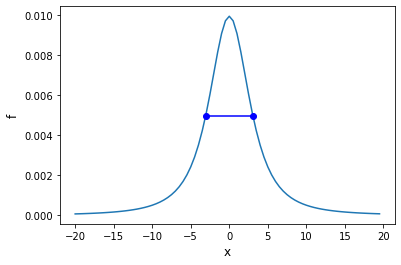

In [214]:
# Your code here
def lorentzian(x,C):
    return 0.5/np.pi*C/(np.power(x**2+C**2,3/2))
C = 4
x = np.arange(-20,20,0.5)
f = lorentzian(x,C)
plt.plot(x,f)

#reverse the gaussian function to look for x value at certain f value
def fwhm_lorz(f,C):
    return np.sqrt(np.power(f*2*np.pi/C,-2/3)-C**2)

#similar reasonings to gaussian
#find and plot the FWHM
xhm = fwhm_lorz(f[40]/2,4)
plt.plot([xhm,-xhm],[f[40]/2,f[40]/2],"bo-") 
print("FWHM is %.2f pixels, or %.2f arcseconds" %(xhm*2, xhm*2*0.5))
plt.xlabel('x',fontsize=12)
plt.ylabel('f',fontsize=12)

## <font color='blue'>Question 5</font>
Consider the general shapes of the 1D Gaussian and 1D Lorentzian functions you investigated above. How does FWHM relate to the parameters $\sigma$ (for a the Gaussian) and $C$ (for the Lorentzian)? Write some code that measured the FWHM for these two distributions for a range of values in $\sigma$ and $C$, and the plot the resulting FWHM. Describe the relationship between FWHM and $\sigma$ for the Gaussian distribution, and the relationship between FWHM and $C$ for the Lorentzian.

2.3548200450309498 1.5328418730817592


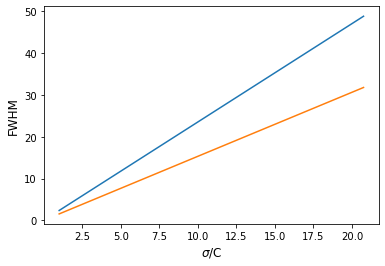

In [267]:
# Your code here
sigmas = np.arange(1,21,0.25)
fgs = np.array([gaussian(x,s) for s in sigmas])
fwhmg = np.array([fwhm_gaus(max(fgs[i]/2),sigmas[i])*2 for i in range(80)])

plt.plot(sigmas,fwhmg)

Cs = np.arange(1,21,0.25)
fls = np.array([lorentzian(x,c) for c in Cs])
fwhml = np.array([fwhm_lorz(max(fls[i]/2),Cs[i])*2 for i in range(80)])

plt.plot(Cs,fwhml)
plt.xlabel("$\sigma$/C",size=12)
plt.ylabel("FWHM",size=12)

slope_g,_ = np.polyfit(sigmas,fwhmg,1)
slope_l,_ = np.polyfit(Cs,fwhml,1)
print(slope_g,slope_l)

__Answer:__  
- For the Gaussian distribution: FWHM = 2.355 $\sigma$ 
- For the Lorentzian distribution: FWHM = 1.533 $C$ 
- So if $\sigma$ and $C$ have the same value, the Lorentzian would be narrower, as we saw in question 3&4